### Covid-19 Model Deployments

# 🩺 COVID-19 Symptom Screening App  

Welcome! This [app](#Deployment) uses a machine learning model trained on reported symptoms to **screen for possible COVID-19 cases**.  
Please answer the questions honestly to get a preliminary risk assessment.  

**Important Notes & Limitations**:  
- This tool is **not a diagnostic test**.  
- Results are based on patterns in data and may produce **false negatives** (missed cases) or **false positives** (false alarms).  
- Always consult a qualified healthcare professional for medical advice, testing, or treatment.  

Use this app as an **early screening aid**, not a replacement for clinical diagnosis.  

We hope it helps raise awareness and support public health efforts.





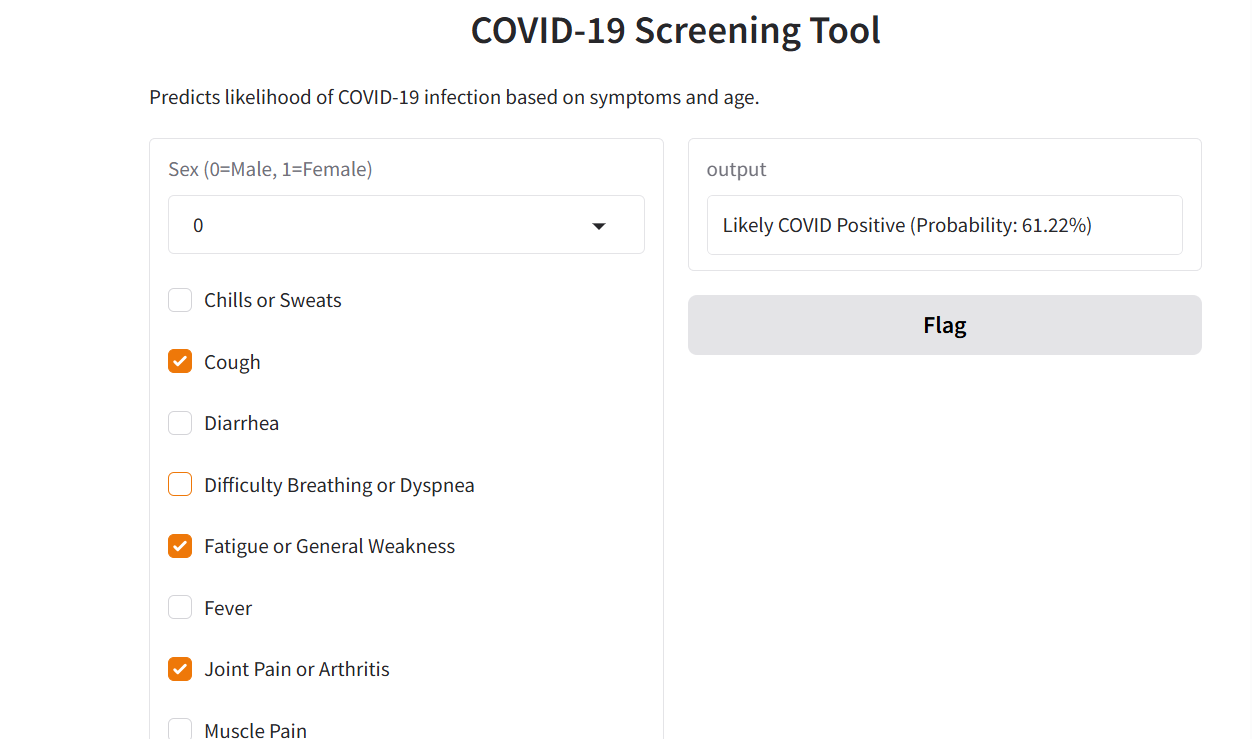

# Deployment

In [1]:
import gradio as gr
import joblib
import numpy as np

# Load model and scaler
model = joblib.load("covid_screening_model.pkl")
scaler = joblib.load("age_scaler.pkl")

# Define prediction function
def predict_covid(sex, chills, cough, diarrhea, dyspnea, fatigue, fever,
                  joint_pain, muscle_pain, nausea, runny_nose, sore_throat, vomiting,
                  loss_of_taste, loss_of_smell, age):
    
    # Scale age
    age_scaled = scaler.transform([[age]])[0][0]
    
    # Prepare input
    input_data = np.array([[sex, int(chills), int(cough), int(diarrhea), int(dyspnea),
                            int(fatigue), int(fever), int(joint_pain), int(muscle_pain),
                            int(nausea), int(runny_nose), int(sore_throat), int(vomiting),
                            int(loss_of_taste), int(loss_of_smell), age_scaled]])
    
    # Prediction
    prob = model.predict_proba(input_data)[0][1]
    pred = model.predict(input_data)[0]
    
    result = "Likely COVID Positive" if pred == 1 else "Likely COVID Negative"
    return f"{result} (Probability: {prob:.2%})"

# Gradio UI
iface = gr.Interface(
    fn=predict_covid,
    inputs=[
        gr.Dropdown([0,1], label="Sex (0=Male, 1=Female)"),
        gr.Checkbox(label="Chills or Sweats"),
        gr.Checkbox(label="Cough"),
        gr.Checkbox(label="Diarrhea"),
        gr.Checkbox(label="Difficulty Breathing or Dyspnea"),
        gr.Checkbox(label="Fatigue or General Weakness"),
        gr.Checkbox(label="Fever"),
        gr.Checkbox(label="Joint Pain or Arthritis"),
        gr.Checkbox(label="Muscle Pain"),
        gr.Checkbox(label="Nausea"),
        gr.Checkbox(label="Runny Nose"),
        gr.Checkbox(label="Sore Throat or Pharyngitis"),
        gr.Checkbox(label="Vomiting"),
        gr.Checkbox(label="Loss of Taste"),
        gr.Checkbox(label="Loss of Smell"),
        gr.Number(label="Age")  # raw age, will be scaled
    ],
    outputs="text",
    title="COVID-19 Screening Tool",
    description="Predicts likelihood of COVID-19 infection based on symptoms and age."
)

iface.launch()


* Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.
